# HAC: Hierarchical Agglomerative Clustering
---
HAC is a clustering algorithm which uses "bottom-up" approach which means each observation starts under its owwn cluster and pair of clusters are merged as one move.

It shows a Dendrogram graph which gives us the full picture of the path taken.

The values on the y-axis is the measure of closeness between points/clusters.

### Linkage types
The multiple ways to link the points together namely:-
1. Average- Uses the average of the distances of each observation of the two sets.
2. Single- Uses the minimum of the distances between all observations of two sets.
3. Complete or Maximum- Uses maximum distance between all observations of the two sets.
4. Ward- Minimizes the variance of the clusters being merged.

In [1]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

import matplotlib.pyplot as plt
import plotly.graph_objects as go 

import pandas as pd 
from geopy import Nominatim
from progressbar import ProgressBar
import time

<frozen importlib._bootstrap>:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [2]:
df = pd.read_csv('../data/weatherAUS.csv', encoding='utf-8')
df = df[pd.isnull(df['RainTomorrow'])==False]

df = df.fillna(df.mean())

df['Location2']=df['Location'].str.replace( r"([A-Z])", r" \1").str.strip()
df['Location2']=df['Location2'].apply(lambda x: 'Pearce, Bullsbrook' if x=='Pearce R A A F' else x)

In [3]:
loc_list = list(df.Location2.unique())

geolocator = Nominatim(user_agent='Mozilla/5.0 (platform; rv:geckoversion) Gecko/geckotrail Firefox/firefoxversion')
country = "Australia"
loc_res = []

pbar = ProgressBar()
for city in pbar(loc_list):
    loc = geolocator.geocode(city+','+ country)
    res = [city, loc.latitude, loc.longitude]
    loc_res = loc_res + [res]
    time.sleep(1)

df_loc = pd.DataFrame(loc_res, columns=['Loc', 'Latitude', 'Longitude'])

df_loc

100% |########################################################################|


,Loc,Latitude,Longitude
0,Albury,-36.080477,146.916280
1,Badgerys Creek,-33.881667,150.744163
2,Cobar,-31.498333,145.834444
3,Coffs Harbour,-30.296241,153.113529
4,Moree,-29.461720,149.840715
5,Newcastle,-32.919295,151.779535
6,Norah Head,-33.281667,151.567778
7,Norfolk Island,-29.028958,167.958729
8,Penrith,-33.751079,150.694168
9,Richmond,-37.820395,145.002515


In [4]:
fig = go.Figure(data=go.Scattergeo(
        lat=df_loc['Latitude'],
        lon=df_loc['Longitude'],
        hovertext=df_loc['Loc'], 
        mode = 'markers',
        marker_color = 'black',
        ))

fig.update_layout(
        title = 'Mapping Australian cities',
        width=1000,
        height=600,
        margin={"r":10,"t":30,"l":0,"b":0},
        geo = dict(
            scope='world',
            projection_type='miller',
            landcolor = "rgb(250, 250, 250)",
            center=dict(lat=-23.69839, lon=133.8813), # focus point
            projection_scale=5 # zoom in on
        ),
    )
fig.show()

#### Average linkage

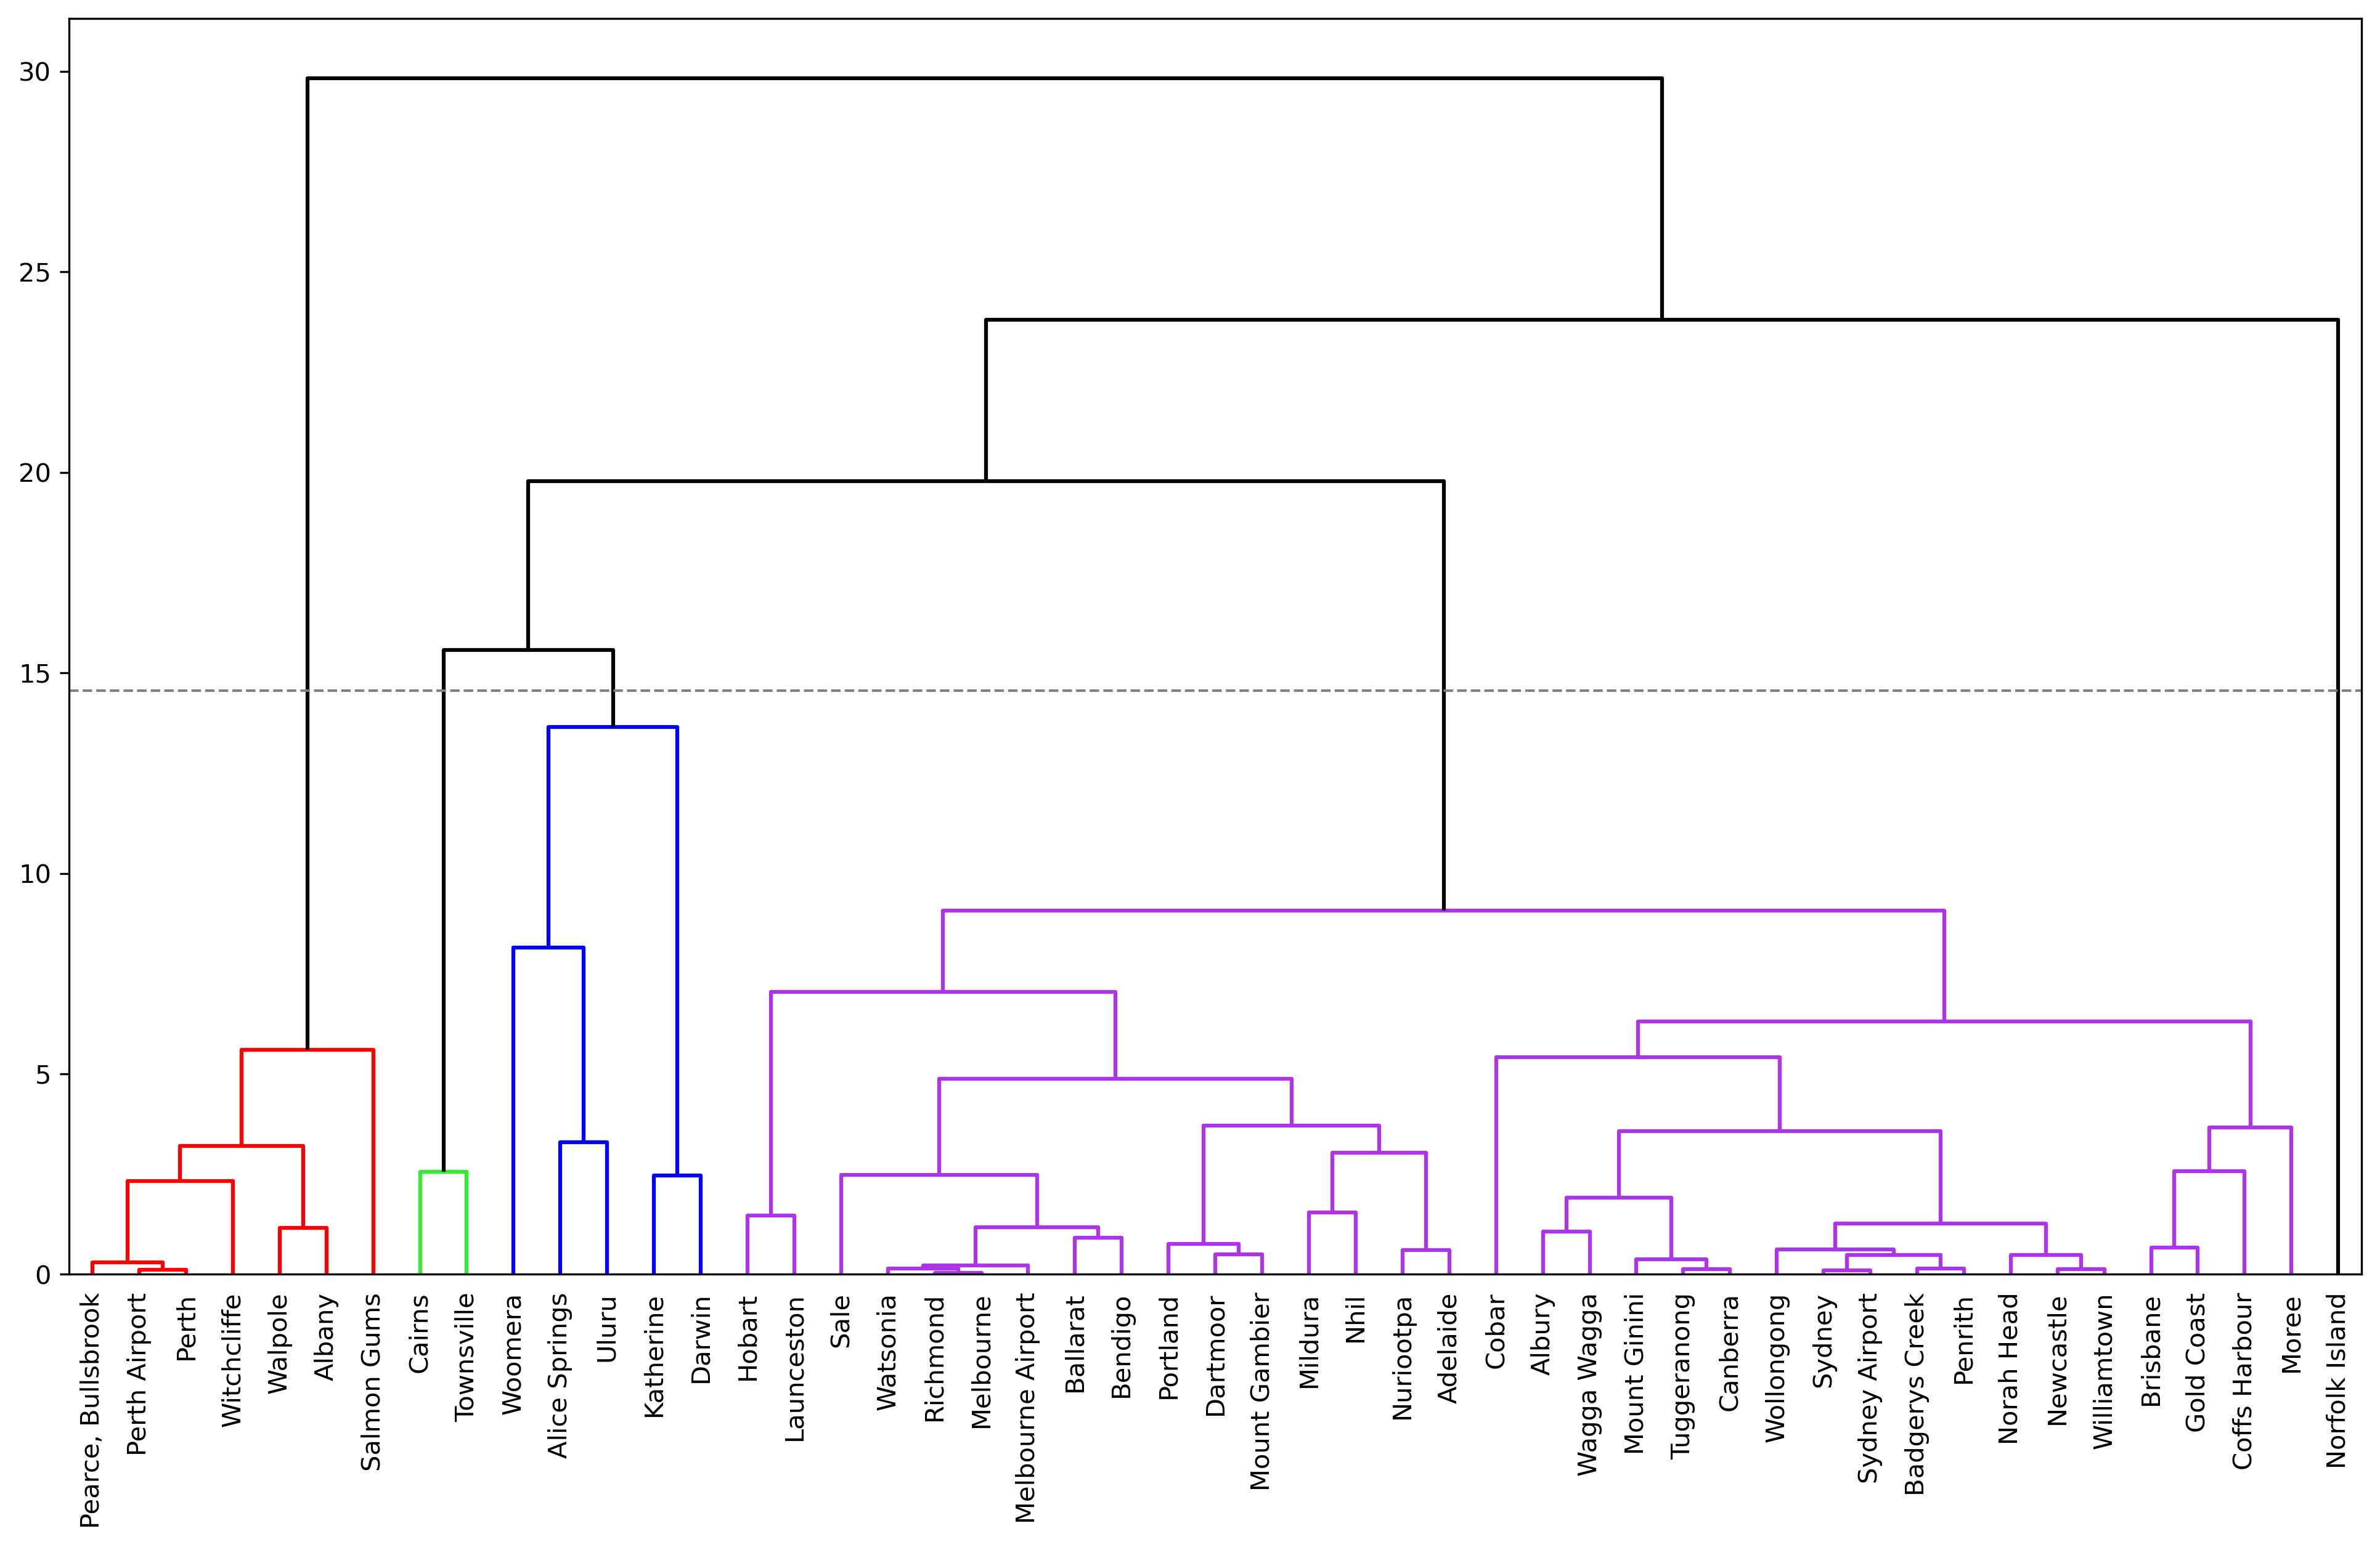

In [5]:
X = df_loc[['Latitude', 'Longitude']]

plt.figure(figsize=(16,9), dpi = 300)

Z = sch.linkage(X, method='average', optimal_ordering=True)

sch.set_link_color_palette(['red', '#34eb34', 'blue', '#ae34eb'])

sch.dendrogram(Z, leaf_rotation=90, leaf_font_size=10, labels=list(df_loc['Loc']), 
               color_threshold=14.55, above_threshold_color='black')

plt.axhline(y=14.55, c='grey', lw=1, linestyle='dashed')

plt.show()

#### Ward linkage 

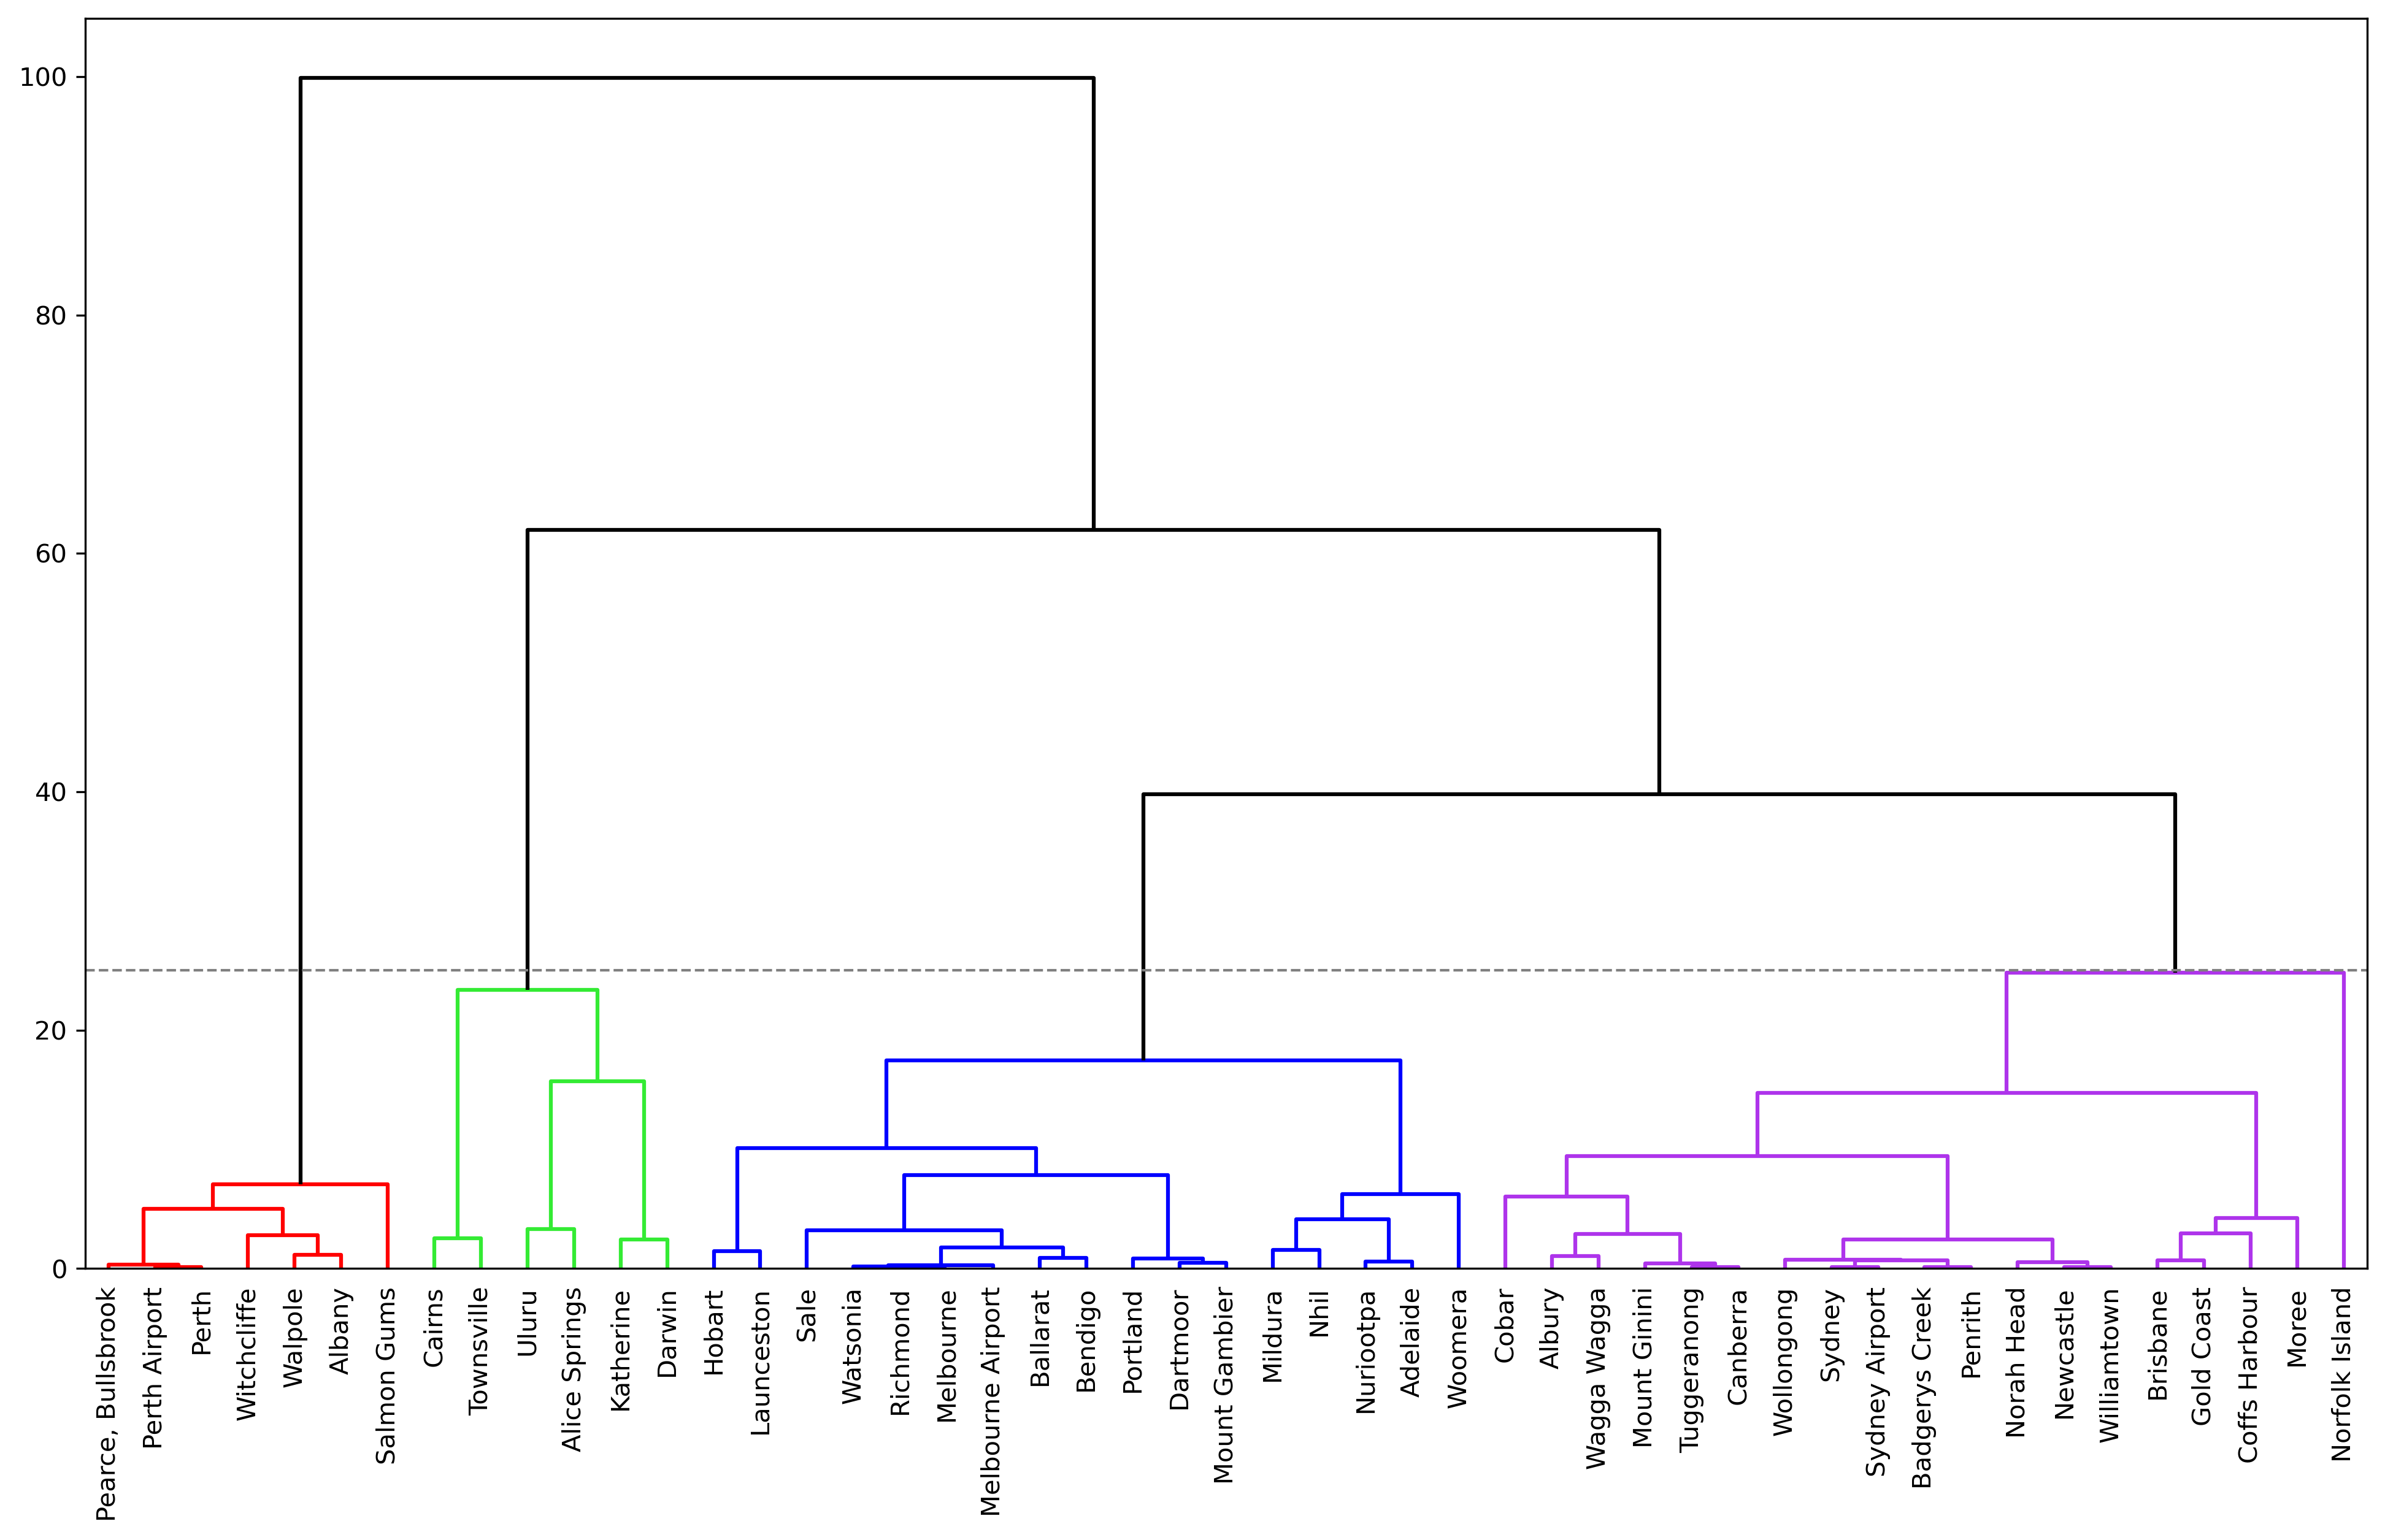

In [6]:
X = df_loc[['Latitude', 'Longitude']]

plt.figure(figsize=(16,9), dpi=300)

Z = sch.linkage(X, method='ward', optimal_ordering=True) # note, we use method='ward'

sch.set_link_color_palette(['red', '#34eb34', 'blue', '#ae34eb'])

sch.dendrogram(Z, leaf_rotation=90, leaf_font_size=10, labels=list(df_loc['Loc']), 
               color_threshold=25, above_threshold_color='black')
 
plt.axhline(y=25, c='grey', lw=1, linestyle='dashed')

plt.show()